In [1]:
import pandas as pd
import numpy as np
import matplotlib
from pylab import mpl,plt
import warnings
warnings.simplefilter('ignore')
# CSVの読み込み
raw = pd.read_csv("../data/1hXBTUSD.csv").dropna()

In [3]:
# 終値のみ切り抜いて新たなデータフレームに格納
data = raw[['close']]
data.rename(columns={'close':'price'},inplace=True)

In [4]:
# 移動平均線の格納
data['SMA1'] = data['price'].rolling(42).mean()
data['SMA2'] = data['price'].rolling(252).mean()

<AxesSubplot:title={'center':'XBT/USD | 42 & 252 days SMAs'}>

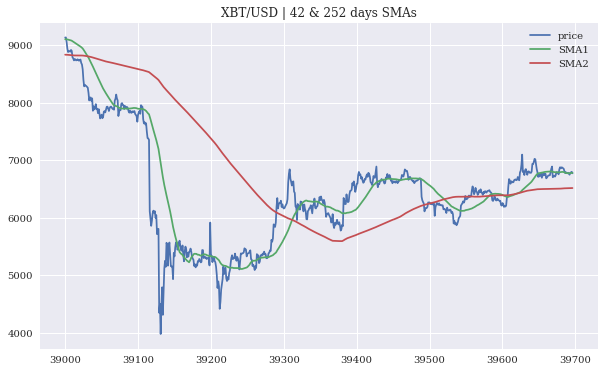

In [5]:
# 一旦plot
%matplotlib inline
from pylab import mpl,plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
data[39000:].plot(title='XBT/USD | 42 & 252 days SMAs',figsize=(10,6))

In [7]:
# 各row時点でのポジションを推測
data['position'] = np.where(data['SMA1'] > data['SMA2'],1,-1)
data.dropna(inplace=True)

In [8]:
#data['position'].plot(ylim=[-1.1,1.1],title='Market Positioning',figsize=(10,6))

<AxesSubplot:>

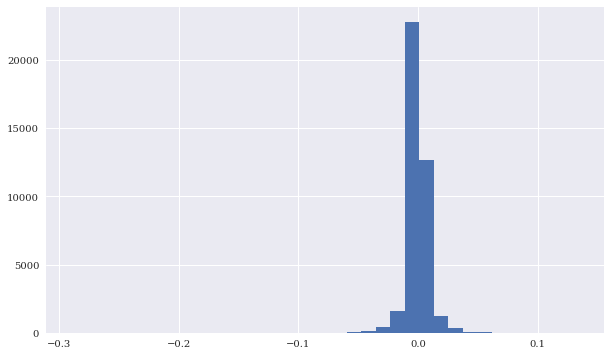

In [9]:
# ホールドのみの戦略の場合のリターンを計算
data['returns'] = np.log(data['price'] / data['price'].shift(1))
# data['returns'].hist(bins=35,figsize=(10,6))

In [10]:
# 移動平均戦略のリターンを計算
data['strategy'] = data['position'].shift(1) * data['returns']
data[['returns','strategy']].sum()

returns     3.337157
strategy    4.074386
dtype: float64

In [11]:
data[['returns','strategy']].sum().apply(np.exp)

returns     28.139023
strategy    58.814367
dtype: float64

<AxesSubplot:>

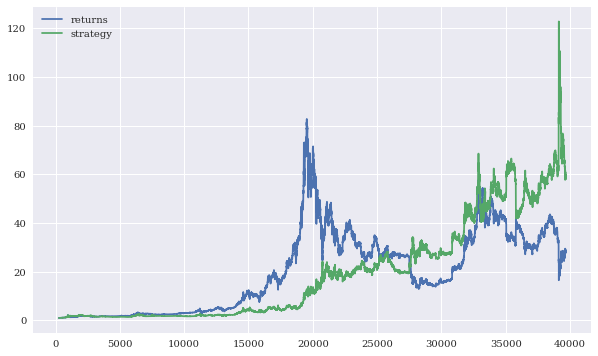

In [13]:
# 結果をplot
data[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [22]:
# 年率換算でのリスク・リターンの統計
# 年率換算した平均リターンを対数のスケールで計算
data[['returns','strategy']].mean() * 252

returns     0.02132
strategy    0.02603
dtype: float64

In [15]:
# 年率換算した平均リターンを通常のスケールで計算
np.exp(data[['returns','strategy']].mean() * 252) - 1

returns     0.021549
strategy    0.026372
dtype: float64

In [19]:
# 年率換算した標準偏差を対数、通常のスケールで計算
print(data[['returns','strategy']].std() * 252 ** 0.5)
print((data[['returns','strategy']].apply(np.exp) - 1).std() * 252 ** 0.5)

returns     0.147890
strategy    0.147887
dtype: float64
returns     0.147203
strategy    0.148585
dtype: float64


<AxesSubplot:>

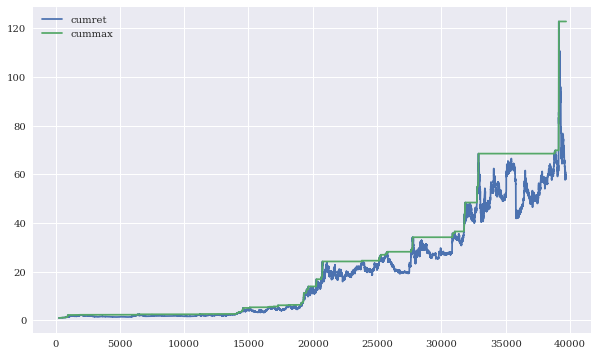

In [23]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)
data['cummax'] = data['cumret'].cummax()
data[['cumret','cummax']].dropna().plot(figsize=(10,6))

In [24]:
drawdown = data['cummax'] - data['cumret']
drawdown.max()

65.08973823567676